<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Rabi_cavity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
%matplotlib inline
!pip install qutip
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy.constants import Boltzmann as k_B
from scipy.constants import elementary_charge as ec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.10  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.05          # cavity dissipation rate
gamma = 0.05           # atom dissipation rate
N = 15                 # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

#tlist = np.linspace(0,25,100)
tlist = np.linspace(0,250,100)

In the given Hamiltonian H_normalized, each term represents a part of the system's energy or the interaction between the system components. Here's the meaning of each term:

1-alpha * a.dag() * a: This term represents the energy of the cavity, with a.dag() being the creation operator and a being the annihilation operator. alpha is the normalized cavity frequency (wc / E_scale).

2-beta * sm.dag() * sm: This term represents the energy of the two-level atom (qubit). sm.dag() is the raising operator and sm is the lowering operator for the qubit. beta is the normalized atom frequency (wa / E_scale).

3-gamma * (a.dag() * sm + a * sm.dag()): This term represents the interaction between the cavity and the qubit. a.dag() * sm represents the process of creating a photon in the cavity while lowering the qubit's energy, and a * sm.dag() represents the process of annihilating a photon in the cavity while raising the qubit's energy. gamma is the normalized coupling strength (g / E_scale).

4- `- delta * tensor(qeye(N), qeye(2- delta * tensor(qeye(N), qeye(2)): This term represents an energy shift due to temperature (T). delta is a normalized energy shift factor that depends on the atom frequency (wa), temperature (T), and Boltzmann constant (k_B). The tensor(qeye(N), qeye(2)) part creates an identity matrix of the appropriate size for the system, which, when multiplied by delta, generates a constant energy shift. In many cases, this term can be neglected when studying the dynamics of the system, especially if you are primarily interested in the interaction between the cavity and the qubit.

In summary, the normalized Hamiltonian H_normalized consists of terms representing the cavity energy, atom energy, interaction between cavity and atom, and an energy shift due to temperature.

In [83]:
# Parameters
wc = 1.0  # cavity frequency 1.0
wa1 = 0.90  # atom frequency 1.0
wa2 = 1.20  
g = 0.05  # coupling strength 0.05
N = 10  # number of cavity fock states
T = 0.1  # temperature 0.1
k_B = 1.380649e-23  # Boltzmann constant

# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom
# Operators
a = tensor(destroy(N), qeye(2))  # cavity annihilation operator
sm = tensor(qeye(N), destroy(2))  # spin lowering operator

# Choose an energy scale
E_scale = max(wc, wa, g)

# Calculate dimensionless coefficients
alpha = wc / E_scale
beta1 = wa1 / E_scale
beta2 = wa2 / E_scale

gamma = g / E_scale
delta1 = k_B * T * np.log(1 - np.exp(-wa1 / (k_B * T))) / E_scale
delta2 = k_B * T * np.log(1 - np.exp(-wa2 / (k_B * T))) / E_scale

#delta = 0.0

# Define the Hamiltonian1
if use_rwa:
    H_normalized1 = E_scale * (alpha * a.dag() * a + beta1 * sm.dag() * sm + gamma * (a.dag() * sm + a * sm.dag()) - delta1 * tensor(qeye(N), qeye(2)))
else:
    H_normalized1 = E_scale * (alpha * a.dag() * a + beta1 * sm.dag() * sm + gamma * (a.dag() * sm + a * sm.dag()) - delta1 * tensor(qeye(N), qeye(2)))
    # Define the Hamiltonian2
if use_rwa:
    H_normalized2 = E_scale * (alpha * a.dag() * a + beta2 * sm.dag() * sm + gamma * (a.dag() * sm + a * sm.dag()) - delta2 * tensor(qeye(N), qeye(2)))
else:
    H_normalized2 = E_scale * (alpha * a.dag() * a + beta2 * sm.dag() * sm + gamma * (a.dag() * sm + a * sm.dag()) - delta2 * tensor(qeye(N), qeye(2)))


In [84]:
c_op_list = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sm)

In [85]:
output1 = mesolve(H_normalized1, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm ])
output2 = mesolve(H_normalized2, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm ])
#output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm - k_B * T * np.log(1 - np.exp(-wa / (k_B * T))) * tensor(qeye(N), qeye(2))])

When rescaling the Hamiltonian, the time variable also needs to be rescaled. To do this, we introduced a dimensionless time variable tau and find its relationship with the original time variable t. The relationship between tau and t can be found by considering the energy scale E_scale.

Recall that the energy scale E_scale is defined as:

E_scale = max(wc, wa, g)

To rescale the time variable t, you can define the dimensionless time tau as:

tau = t * E_scale

Conversely, to find the original time t from the dimensionless time tau, you can use:

t = tau / E_scale

When you solve the system using the normalized Hamiltonian, you will use the dimensionless time tau. After obtaining the results, you can convert them back to the original time scale t using the relationship above.

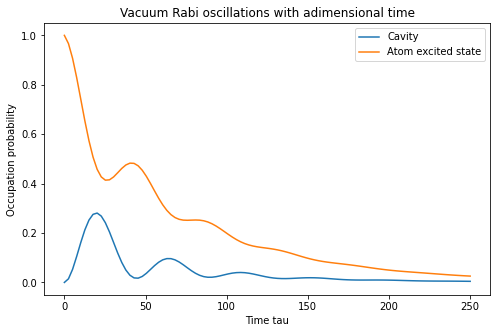

In [86]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output1.expect[0], label="Cavity")
ax.plot(tlist, output1.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time tau')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations with adimensional time');

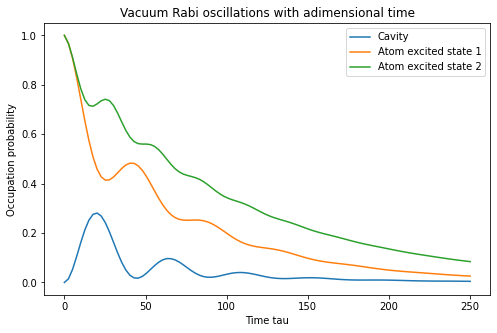

In [87]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output1.expect[0], label="Cavity")
ax.plot(tlist, output1.expect[1], label="Atom excited state 1")
ax.plot(tlist, output2.expect[1], label="Atom excited state 2")
ax.legend()
ax.set_xlabel('Time tau')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations with adimensional time')
# save the plot as a PNG image
fig.savefig('rabi_cavity.png', dpi=300, bbox_inches='tight')


In [88]:
t=10
t_idx = np.abs(tlist - t).argmin()
cavity_occ = output1.expect[0][t_idx]
atom_exc = output1.expect[1][t_idx]

print("Cavity occupation number at time t: ", cavity_occ)
print("Atom excited state occupation probability at time t: ", atom_exc)

Cavity occupation number at time t:  0.1613581166373419
Atom excited state occupation probability at time t:  0.7418258174621297
